<a href="https://colab.research.google.com/github/iammuhammad41/Contrastive-Learning/blob/main/contrastive_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

In [ ]:
model=CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
processor=CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
image=Image.open("/content/input/animal-faces/afhq/train/cat/flickr_cat_000002.jpg")

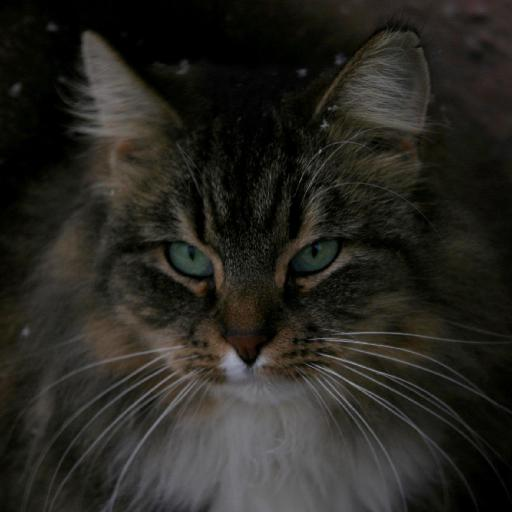

In [ ]:
image

In [ ]:
# define text classes
text_classes=["a photo of a cat", "a photo of a dog"]

# pass image nad text classes to processor
inputs=processor(text=text_classes, images=image, return_tensors="pt", padding=True)

outputs=model(**inputs)

In [ ]:
# image-text similarity score
logits_per_image=outputs.logits_per_image

# convert scores to probs via softmax
probs=logits_per_image.softmax(dim=1)

# print prediciton
predicted_class=text_classes[probs.argmax()]
print(predicted_class, "| Probability =", round(float(probs[0][probs.argmax()]),4))

a photo of a cat | Probability = 0.9975


In [ ]:
image_name_list=[
    "/content/input/animal-faces/afhq/train/cat/flickr_cat_000003.jpg",
    "/content/input/animal-faces/afhq/train/cat/flickr_cat_000004.jpg",
    "/content/input/animal-faces/afhq/train/cat/flickr_cat_000005.jpg"
]

image_list=[]

for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [ ]:
query="a cute dog"

inputs=processor(text=query, images=image_list, return_tensors="pt", padding=True)

In [ ]:
outputs=model(**inputs)
logits_per_text=outputs.logits_per_text
probs=logits_per_text.softmax(dim=1)

best_match=image_list[probs.argmax()]
prob_match=round(float(probs[0][probs.argmax()]),4)

print("Match probability: ", prob_match)

Match probability:  0.7085


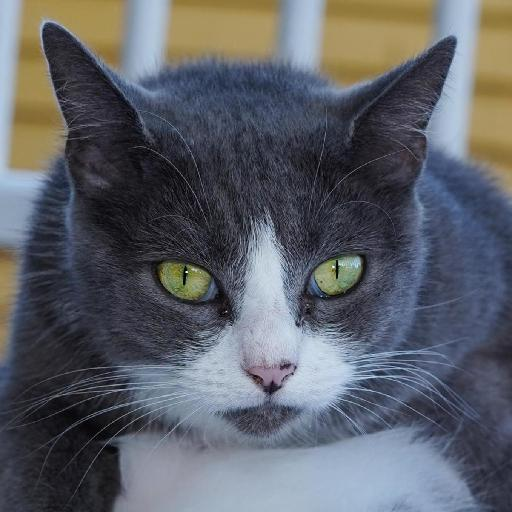

In [ ]:
best_match